# 传染病模型

以阈值模型为例说明传染病动力学数学模型的建模过程

## 1. 模型假设
1. 被研究的人群是封闭的，总人数为$n$。$s(t),i(t)$和$r(t)$分别表示$t$时刻人群中易感染着、感染者(病人)和免疫者的人数。起始条件为$s_0$个易感染者，$i_0$个感染者，免疫者$n-s_0-i_0$
2. 易感人数的变化率与当时的易感人数和感染人数之积成正比，比例系数为$\lambda$
3. 免疫者人数的变化率与当时的感染者人数成正比，比例系数为$\mu$
4. 三类人总的变化率代数和为零

## 2.模型建立(Kermack-Mckendrick方程)
$\frac{ds}{dt} = -\lambda s_i$

$\frac{di}{dt} = \lambda s_i-\mu i$

$\frac{dr}{dt} = \mu i$

$s(t)+i(t)+r(t) = n$

## 3.模型求解与分析
上述模型无法直接求出三者的解析解，转到平面$s-i$上来讨论解的性质，方程中的前两个方程消去$dt$得

$\frac{di}{ds} = \frac{1}{\sigma}-1$

$i|_{s=s_0} = i_0$

其中$\sigma = \frac{\lambda}{\mu}$，是一个传染期内每个患者有效接触的平均人数，称为接触数

Eq(i(s), i0 - s + s0 + log(s)/n - log(s0)/n)


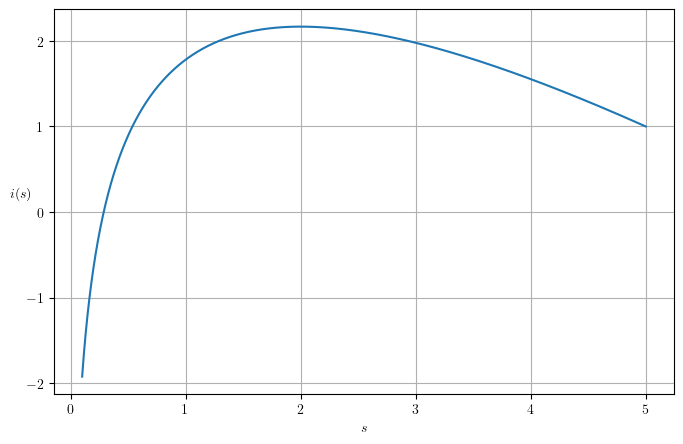

In [43]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

s, n, i0, s0 = sp.symbols('s n i0 s0')
i = sp.Function('i')
eq = sp.diff(i(s),s) - 1/(n*s)+1
res_is = sp.dsolve(eq=eq, ics={i(s0):i0})
res = res_is.args[1]
print(res_is)

# #绘图
plt.rc('text',usetex=True)
# x = np.linspace(1, 100, 100)
# y = np.array([float(res.subs(s0,10).subs(i0,5).subs(n,4).subs(s,j)) for j in x])
# print(y)
# plt.plot(x,y)
# plt.show()

# 定义数值函数
res_numeric = sp.lambdify(   #用于将 符号表达式 转换为 数值计算函数
    (s, n, i0, s0),  # 变量
    res,             # 表达式
    modules='numpy'  # 使用 NumPy 计算
)

# 设定参数并计算
n_val = 0.5
i0_val = 1
s0_val = 5
s_vals = np.linspace(0.1, 5, 10000)  # 避免 s=0
i_vals = res_numeric(s_vals, n_val, i0_val, s0_val)  #数值计算函数,输入变量顺序必须与 (s, n, i0, s0) 严格一致。

# 绘图
plt.figure(figsize=(8, 5))
plt.plot(s_vals, i_vals)
plt.xlabel('$s$')
plt.ylabel('$i(s)$',rotation=0)
# plt.title('Solution of the ODE: $\frac{di}{ds} - \frac{1}{n s} + 1 = 0$')
# plt.legend()
plt.grid(True)
plt.show()

## 4.参数估计
估计$\sigma$的值：记$s_{\infty},i_{\infty}$分别为传染病流行结束后的健康人数和患者人数。当流行结束后，患者都将转换为免疫者。所以$i_{\infty} = 0$，由此可得

$i_{\infty} = 0 = s_0+i_0-s_{\infty}+\frac{1}{\sigma}ln\frac{s_{\infty}}{s_0}$

解的$\sigma$为

$\sigma = \frac{lns_0-lns_{\infty}}{s_0+i_0-s_{\infty}}$

In [4]:
import numpy as np

s0 = 155.0
i0 = 1.0
s_inf = 60.0
sigma = (np.log(s0)-np.log(s_inf))/(s0+i0-s_inf)
print('sigma=', sigma)
S = np.array([155,153,139,101])
I = (s0+i0)-S+1/sigma*np.log(S/s0)
print('所求的解为:\n', I)

sigma= 0.009886255778095274
所求的解为:
 [ 1.          1.6863383   5.97953014 11.67676321]
